In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="McrhzGgUVuaQbO2a1BX6")
project = rf.workspace("chandai").project("lunar-scene-analysis-fejkh")
version = project.version(5)
dataset = version.download("coco-segmentation")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
model = project.version(5).model

In [3]:
from tkinter import Tk, filedialog

def pick_image():
    Tk().withdraw()  # hide main window
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tif *.tiff")]
    )
    return file_path

#image_path = pick_image()
#print("Selected image:", image_path)

In [7]:

# # Run inference on an image (Instance Segmentation)

#image_path = r"D:\Moon Dataset\render\render0122.png"  # use a single image file, not a folder

image_path=pick_image()

# Run prediction
predictions = model.predict(image_path, confidence=40).json()

# Print results
print(predictions)


{'predictions': [{'x': 416.3781280517578, 'y': 388.9091491699219, 'width': 471.5107116699219, 'height': 173.58172607421875, 'confidence': 0.8691344261169434, 'class': 'boulder', 'points': [{'x': 386.0, 'y': 308.0}, {'x': 385.0, 'y': 309.0}, {'x': 378.0, 'y': 309.0}, {'x': 377.0, 'y': 310.0}, {'x': 371.0, 'y': 310.0}, {'x': 370.0, 'y': 311.0}, {'x': 367.0, 'y': 311.0}, {'x': 366.0, 'y': 312.0}, {'x': 364.0, 'y': 312.0}, {'x': 363.0, 'y': 313.0}, {'x': 359.0, 'y': 313.0}, {'x': 358.0, 'y': 314.0}, {'x': 353.0, 'y': 314.0}, {'x': 352.0, 'y': 315.0}, {'x': 347.0, 'y': 315.0}, {'x': 346.0, 'y': 316.0}, {'x': 340.0, 'y': 316.0}, {'x': 339.0, 'y': 317.0}, {'x': 311.0, 'y': 317.0}, {'x': 310.0, 'y': 318.0}, {'x': 305.0, 'y': 318.0}, {'x': 304.0, 'y': 319.0}, {'x': 299.0, 'y': 319.0}, {'x': 298.0, 'y': 320.0}, {'x': 292.0, 'y': 320.0}, {'x': 291.0, 'y': 321.0}, {'x': 285.0, 'y': 321.0}, {'x': 284.0, 'y': 322.0}, {'x': 278.0, 'y': 322.0}, {'x': 277.0, 'y': 323.0}, {'x': 273.0, 'y': 323.0}, {'x':

In [34]:
# # Visualize predictions

from PIL import Image, ImageDraw
import cv2
import numpy as np
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

for obj in predictions['predictions']:
   
        points = [(p['x'], p['y']) for p in obj['points']]
        draw.polygon(points, outline="red")
       
   
img.show()
print(img)


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x480 at 0x270744FFC50>


In [15]:
from location import describe_location

# --- Get image dimensions ---
img_width = int(predictions['image']['width'])
img_height = int(predictions['image']['height'])

# --- Loop through predictions and print user-friendly locations ---
for i, obj in enumerate(predictions['predictions']):
    class_name = obj['class'].capitalize()
    loc_label = describe_location(obj['x'], obj['y'], obj['width'], obj['height'], img_width, img_height)
    
    print(f"{class_name} detected in the {loc_label} area of the image.")


Boulder detected in the bottom-right area of the image.
Rock detected in the middle-left area of the image.
Rock detected in the bottom-left area of the image.
Rock detected in the top-center area of the image.
Rock detected in the bottom-left area of the image.
Rock detected in the bottom-left area of the image.
Rock detected in the middle-right area of the image.
Rock detected in the middle-center area of the image.
Rock detected in the middle-left area of the image.


Boulder detected in the bottom-right area of the image:
  Diameter: 0.40 m
  Area: 0.04 m²



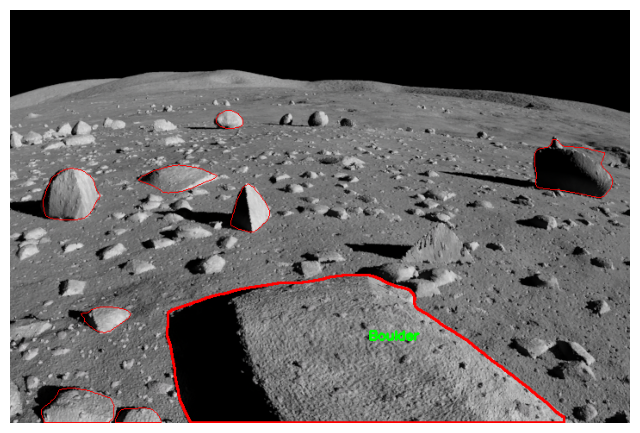

In [28]:
import cv2
import numpy as np
from measurement import polygon_diameter_m ,polygon_area_m2
import matplotlib.pyplot as plt
lst=['Rocky Region', 'Crater' ,'Boulder']

for obj in predictions['predictions']:
    class_name = obj['class'].capitalize()
    polygon_points = [(p['x'], p['y']) for p in obj['points']]
    
    # Calculate diameter and area using your functions
    if class_name in lst:
        diameter_m = polygon_diameter_m(polygon_points,'Chang 3')  # replace with mission name or variable
        area_m2 = polygon_area_m2(polygon_points,"Chang 3")
    
    # Describe location
        loc_label = describe_location(obj['x'], obj['y'], obj['width'], obj['height'], img_width, img_height)
    
    # Print user-friendly textual output
        print(f"{class_name} detected in the {loc_label} area of the image:")
        print(f"  Diameter: {diameter_m:.2f} m")
        print(f"  Area: {area_m2:.2f} m²\n")
    
    # Optional visualization
        img=np.array(img)
        img_2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.polylines(img, [np.array(polygon_points, np.int32)], isClosed=True, color=(255,0,0), thickness=2)
        cv2.putText(img, class_name, (int(obj['x']), int(obj['y']-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
        
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [ ]:
import math
from mission_details import add_or_update_mission ,show_missions 
from measurement import compute_resolution_m_per_pixel

# Example: Chang'e 3 Navcam
focal_length_mm = 50.0       # Navcam / PCAM focal length
sensor_width_mm = 36.0       # full-frame equivalent, adjust for real sensor
image_width_px = 1024        # image width in pixels
distance_to_surface_m = 1.2  # camera height above ground

resolution_m = compute_resolution_m_per_pixel(focal_length_mm, sensor_width_mm, image_width_px, distance_to_surface_m)
#print(f"Estimated ground resolution for Chang'e 3 Navcam: {resolution_m:.6f} m/pixel")

# You can now store this in your mission DB
add_or_update_mission(
    mission="Chang 3",
    rover="Yutu",
    camera="Navcam",
    resolution_m_per_pixel=resolution_m,
    rover_height_m=distance_to_surface_m,
    camera_fov_deg=None,
    other_notes="Lunar landing 2013; estimated resolution"
)


Mission 'Chang 3' exists. Updating details...
Mission details saved!


In [ ]:
show_missions()

   Mission Rover  Camera  Resolution_m_per_pixel  Rover_Height_m  \
0  Chang 3  Yutu  Navcam                0.000844             1.2   

   Camera_FOV_deg                               Other_Notes  
0             NaN  Lunar landing 2013; estimated resolution  
